# 5.5 专题：朴素贝叶斯分类（Naive Bayes Classifiers）

## 5.5.1 贝叶斯分类

之所以称为“朴素”或“朴素贝叶斯”，是因为如果对每种标签的生成模型进行非常简单的假设，就能找到每种类型生成模型的近似解，然后就可以使用贝叶斯分类。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 5.5.2 高斯朴素贝叶斯

最容易理解的朴素贝叶斯分类器

这个分类器假设每个标签的数据都服从简单的高斯分布

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

In [4]:
x.shape

(100, 2)

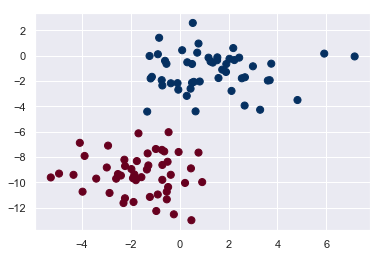

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='RdBu')

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
model = GaussianNB()

In [8]:
model.fit(x, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
rng = np.random.RandomState(0)

In [10]:
xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

In [11]:
ynew = model.predict(xnew)

In [12]:
ynew

array([1, 1, 1, ..., 0, 1, 1])

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

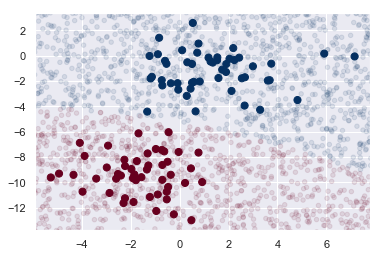

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(xnew[:, 0], xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

计算样本属于某个标签的概率

In [14]:
yprob = model.predict_proba(xnew)

In [15]:
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## 5.5.3 多项式朴素贝叶斯

1. 案例：文本分类

In [16]:
from sklearn.datasets import fetch_20newsgroups

In [17]:
data = fetch_20newsgroups()

In [18]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [19]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

In [20]:
train = fetch_20newsgroups(subset='train', categories=categories)

In [21]:
test = fetch_20newsgroups(subset='test', categories=categories)

In [22]:
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

创建一个管道，将TF-IDF向量化与多项式朴素贝叶斯分类器组合在一起

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
from sklearn.pipeline import make_pipeline

In [26]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

通过这个管道，就可以将模型应用到训练数据上，预测出每个测试数据的标签。

In [27]:
model.fit(train.data, train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [28]:
labels = model.predict(test.data)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
mat = confusion_matrix(test.target, labels)

In [31]:
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]], dtype=int64)

Text(123.75,0.5,'predicted label')

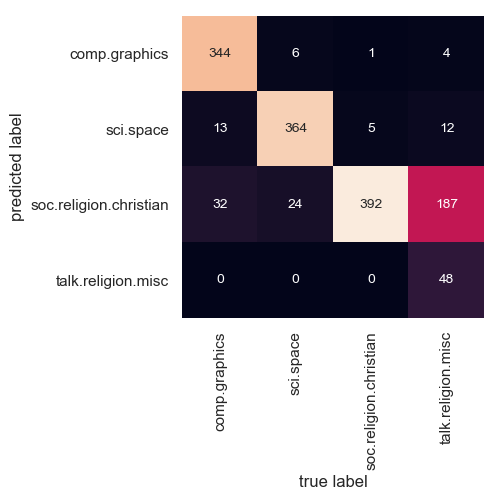

In [32]:
plt.figure(dpi=100)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

下面的函数可以快速返回字符串的预测结果：

In [33]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

下面试试模型预测的效果：

In [34]:
predict_category('sending a payload to the ISS')

'sci.space'

In [35]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [36]:
predict_category('determining the screen resolution')

'comp.graphics'

In [47]:
model2 = TfidfVectorizer()

In [48]:
document = ["I have a pen.",
            "I have an apple."]

In [49]:
tfidf_model = TfidfVectorizer().fit(document)

In [50]:
sparse_result = tfidf_model.transform(document)

In [52]:
print(sparse_result)

  (0, 3)	0.8148024746671689
  (0, 2)	0.5797386715376657
  (1, 2)	0.4494364165239821
  (1, 1)	0.6316672017376245
  (1, 0)	0.6316672017376245


In [53]:
print(sparse_result.todense()) 

[[0.         0.         0.57973867 0.81480247]
 [0.6316672  0.6316672  0.44943642 0.        ]]


In [54]:
print(tfidf_model.vocabulary_)

{'have': 2, 'pen': 3, 'an': 0, 'apple': 1}


# 5.6 专题：线性回归

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

## 5.6.1 简单线性回归

In [56]:
rng = np.random.RandomState(1)

In [57]:
x = 10 * rng.rand(50)

In [58]:
y = 2 * x - 5 + rng.randn(50)

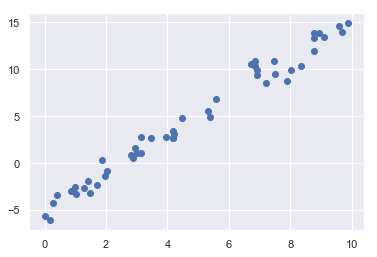

In [60]:
plt.scatter(x, y)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression(fit_intercept=True)

In [63]:
model.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
xfit = np.linspace(0, 10, 1000)

In [65]:
yfit = model.predict(xfit[:, np.newaxis])

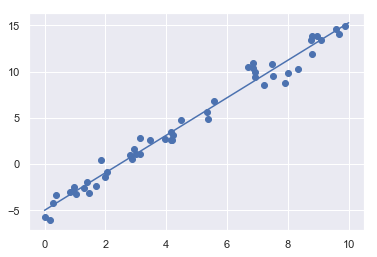

In [66]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [67]:
model.coef_

array([2.02720881])

In [68]:
model.intercept_

-4.9985770855532

In [69]:
X = 10 * rng.rand(100, 3)
Y = 0.5 + np.dot(X, [1.5, -2, 1])

In [70]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
model.intercept_

0.5

In [72]:
model.coef_

array([ 1.5, -2. ,  1. ])

np.dot：点积

## 5.6.2 基函数回归

1. 多项式奇函数

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
x = np.array([2, 3, 4])

In [81]:
poly = PolynomialFeatures(3, include_bias=False)

In [82]:
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [83]:
from sklearn.pipeline import make_pipeline

In [84]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [85]:
rng = np.random.RandomState(1)

In [86]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

In [89]:
poly_model.fit(x[:, np.newaxis], y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [90]:
yfit = poly_model.predict(xfit[:, np.newaxis])

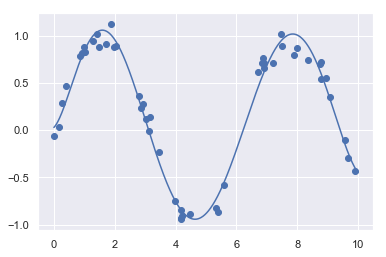

In [92]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

2. 高斯基函数

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

In [96]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """一维输入均匀分布的高斯特征"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # 在数据区间中创建N个高斯分布中心
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)


In [97]:
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

In [98]:
gauss_model.fit(x[:, np.newaxis], y)

Pipeline(memory=None,
         steps=[('gaussianfeatures', GaussianFeatures(N=20, width_factor=2.0)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [99]:
yfit = gauss_model.predict(xfit[:, np.newaxis])

(0, 10)

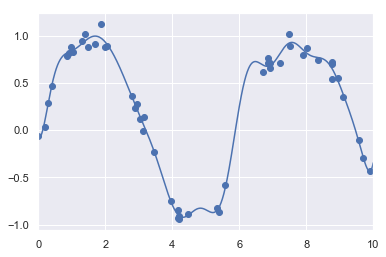

In [100]:
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

## 5.6.3 正则化

虽然在线性回归的模型中引入基函数会让模型变得更加灵活，但也很容易造成过拟合。如果选择了太多高斯基函数，那么最终的拟合结果看起来可能并不好

In [101]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())

In [102]:
model.fit(x[:, np.newaxis], y)

Pipeline(memory=None,
         steps=[('gaussianfeatures', GaussianFeatures(N=30, width_factor=2.0)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

(-1.5, 1.5)

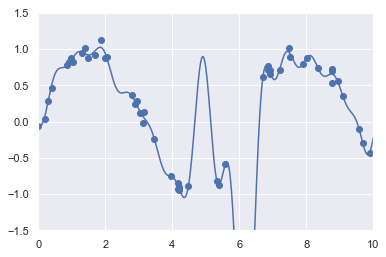

In [104]:
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

如果将高斯基函数的系数画出来，就可以看到过拟合的原因

In [105]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
    
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))

In [106]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())

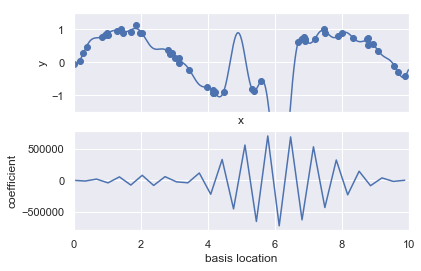

In [107]:
basis_plot(model)

这幅图显示了每个位置上的基函数的振幅。当基函数重叠的时候，通常就表明出现了过拟合：相邻基函数的系数相互抵消。这显然是有问题的，如果对较大的模型参数进行惩罚，从而抑制模型剧烈波动，应该就可以解决这个问题了。这个惩罚机制被称为正则化，有几种不同的表现形式。

1. 岭回归（L2范数正则化）

有时也被称为吉洪诺夫正则化，其处理方法是对模型系数平方和进行惩罚。

In [108]:
from sklearn.linear_model import Ridge

In [109]:
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))

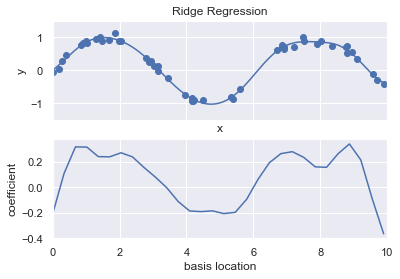

In [110]:
basis_plot(model, title='Ridge Regression')

岭回归一个重要的有点事：它可以非常高效的计算——因此相比原始的线性回归，几乎没有消耗更多的计算资源

2. Lasso正则化（L2范数）

其处理方法是对模型系数绝对值的和进行惩罚

虽然它在形式上非常接近岭回归，但是其结果与岭回归差别很大。例如，由于其几何特性，Lasso正则化倾向于构建稀疏模型，也就是说，它更喜欢将模型系数设置为0.

In [111]:
from sklearn.linear_model import Lasso

In [112]:
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))

d:\python35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870490665, tolerance: 0.002065280097246271
  positive)


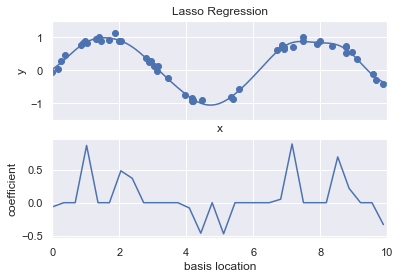

In [113]:
basis_plot(model, title='Lasso Regression')

通过Lasso回归惩罚，大多数基函数的系数都变成了0，所以模型变成了原来基函数的一小部分。

## 5.6.4 案例：预测自行车流量

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
counts = pd.read_csv('./data/FremontBridge.csv', index_col='Date', parse_dates=True)

In [3]:
weather = pd.read_csv('./data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [4]:
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [5]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [6]:
daily = counts.resample('d', how='sum')

d:\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [7]:
daily.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03,1760.0,1761.0
2012-10-04,1708.0,1767.0
2012-10-05,1558.0,1590.0
2012-10-06,1080.0,926.0
2012-10-07,1191.0,951.0


In [8]:
daily['Total'] = daily.sum(axis=1)

In [9]:
daily.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


In [10]:
# 删除其他的列
daily = daily[['Total']]

In [11]:
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


在数据中加上7列0-1值表示星期几

In [12]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [13]:
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [14]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


再增加一列表示当天是否为节假日

In [15]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [16]:
cal = USFederalHolidayCalendar()

In [17]:
holidays = cal.holidays('2012', '2016')

In [18]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))

In [19]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [20]:
daily['holiday'].fillna(0, inplace=True)

In [21]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


白昼时间也会影响汽车人数，用标准的天文计算来添加这列信息

np.clip(m, 0, 2)：将m限制在0-2之间，小于0的改为0，大于2的改为2

In [22]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """计算指定日期的白昼时间"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

In [25]:
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

In [26]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208


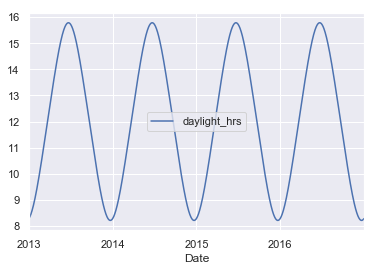

In [30]:
daily[['daylight_hrs']]['2013':'2016'].plot()

增加每一天的平均气温和总降雨量

In [31]:
# 温度是按照1/10摄氏度统计的，首先转换为摄氏度
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp($^o$C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

In [32]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,Temp($^o$C)
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,12.8,5.0,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,8.90
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,10.6,2.8,45,180,200,...,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999,6.70
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,11.7,7.2,23,180,170,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,9.45
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,12.2,5.6,47,180,190,...,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999,8.90
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,8.9,2.8,61,200,220,...,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,5.85


In [33]:
# 降雨量也是按照1/10mm统计的，转化为英寸
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

In [62]:
weather.tail()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,Temp($^o$C),dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2015-08-28,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.019685,0,0,23.3,15.6,26,230,240,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,19.45,0
2015-08-29,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1.279528,0,0,22.2,13.3,58,210,210,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,17.75,0
2015-08-30,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.401575,0,0,20.0,12.8,47,200,200,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,16.40,0
2015-08-31,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.000000,0,0,18.9,16.1,58,210,210,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,17.50,1
2015-09-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.228346,0,0,19.4,13.9,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,16.65,0


In [35]:
daily = daily.join(weather[['PRCP', 'Temp($^o$C)', 'dry day']])

In [36]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp($^o$C),dry day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0


增加一个从1开始递增的计数器，表示一年已经过去了多少天，这个特征可以让我们看到每一年自行车流量的增长或减少

In [37]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [38]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp($^o$C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [39]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp($^o$C)', 'annual']

In [63]:
x = daily[column_names][:'2015-09-01']

In [64]:
x.tail()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,dry day,Temp($^o$C),annual
Date,,,,,,,,,,,,,
2015-08-28,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.418591,0.019685,0.0,19.45,2.901370
2015-08-29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.362212,1.279528,0.0,17.75,2.904110
2015-08-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.305611,0.401575,0.0,16.40,2.906849
2015-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.248802,0.000000,1.0,17.50,2.909589
2015-09-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.191795,0.228346,0.0,16.65,2.912329


In [65]:
y = daily.Total[:'2015-09-01']

In [66]:
y.tail()

Date
2015-08-28    2653.0
2015-08-29     699.0
2015-08-30    1213.0
2015-08-31    2823.0
2015-09-01    2876.0
Freq: D, Name: Total, dtype: float64

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression(fit_intercept=False)

In [69]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

由于天气的时间最后是2015-09-01，所以前面的数据全部把时间设到这个时间点。

In [77]:
daily = daily.loc[:'2015-09-01', :]

In [78]:
daily['predicted'] = model.predict(x)

In [79]:
daily.tail()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp($^o$C),dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2015-08-28,2653.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.418591,0.019685,19.45,0.0,2.901370,3239.485894
2015-08-29,699.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.362212,1.279528,17.75,0.0,2.904110,1002.649045
2015-08-30,1213.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.305611,0.401575,16.40,0.0,2.906849,1460.888106
2015-08-31,2823.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.248802,0.000000,17.50,1.0,2.909589,3978.450527
2015-09-01,2876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.191795,0.228346,16.65,0.0,2.912329,3321.630431


最后，对比自行车真是流量（Total字段）与预测流量（predicted字段）

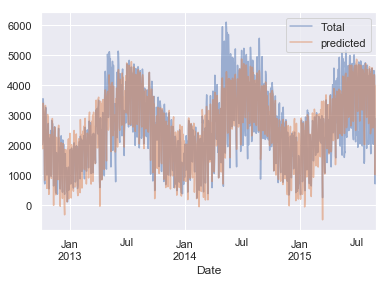

In [80]:
daily[['Total', 'predicted']].plot(alpha=0.5)

看看模型的系数，评估各个特征对每日自行车流量的影响。

In [81]:
params = pd.Series(model.coef_, index=x.columns)

In [82]:
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp($^o$C)       65.162791
annual            26.942713
dtype: float64

采用自举重采样方法快速计算数据的不确定性

In [83]:
from sklearn.utils import resample

In [84]:
np.random.seed(1)

In [85]:
err = np.std([model.fit(*resample(x, y)).coef_ for i in range(1000)], 0)

有了误差估计之后，再来看这些结果

In [86]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp($^o$C)     65.0    4.0
annual          27.0   18.0
